<a href="https://colab.research.google.com/github/chesyaivana/Kel.04_sysrec/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.  Load and Preprocess Data
mengimpor semua library yang diperlukan untuk analisis sentimen. Library seperti pandas, numpy, dan matplotlib digunakan untuk manipulasi data dan visualisasi. Library Keras digunakan untuk membangun model CNN. nltk digunakan untuk preprocessing teks, termasuk penghapusan stopword.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


memuat dataset, membersihkan kolom yang tidak relevan, menghapus entri NaN pada kolom Reviews, dan memproses teks dengan fungsi preprocess_text yang membersihkan teks dari karakter khusus, mengubahnya menjadi huruf kecil, serta menghapus stopword.

In [ ]:
# Load dataset
data = pd.read_csv('Tempat-Wisata-Toba-Preprocessing.csv')

In [ ]:
# Drop unnecessary columns
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0', 'PlaceID'], axis=1)

In [ ]:
# Handle missing values
data = data.dropna(subset=['Reviews'])

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())  # Remove special characters and convert to lowercase
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

In [ ]:
# Apply preprocessing
data['Reviews'] = data['Reviews'].apply(preprocess_text)

# 2. Label Encoding


mengubah kolom Rating menjadi label sentimen (positif, netral, negatif) berdasarkan skala rating. LabelEncoder digunakan untuk mengonversi label sentimen menjadi angka, dan to_categorical mengubah label tersebut menjadi representasi one-hot untuk digunakan dalam pelatihan model.

In [ ]:
# Label encoding for sentiment (you might need to manually classify the sentiment)
data['Sentiment'] = data['Rating'].apply(lambda x: 'positive' if x >= 4 else ('neutral' if x == 3 else 'negative'))
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

In [ ]:
# One-hot encoding for the target variable
y = to_categorical(data['Sentiment'])

# 3. Tokenization and Padding

menggunakan Tokenizer untuk mengubah teks menjadi urutan angka, di mana setiap angka merepresentasikan kata. Data kemudian diubah menjadi urutan dengan panjang yang seragam menggunakan pad_sequences agar dapat diproses oleh CNN.

In [ ]:
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(data['Reviews'])
sequences = tokenizer.texts_to_sequences(data['Reviews'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# 4. Split Data

membagi data ke dalam set pelatihan (80%) dan set pengujian (20%) untuk memastikan model diuji dengan data yang tidak terlihat selama pelatihan.

In [ ]:
# Setup Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# 5. Model CNN

mendefinisikan arsitektur CNN dengan Embedding layer untuk mengonversi kata ke vektor numerik, Conv1D untuk ekstraksi fitur, GlobalMaxPooling1D untuk pengurangan dimensi, dan Dense layer untuk klasifikasi. Model dikompilasi dengan adam optimizer dan dilatih menggunakan data training.

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/10
444/444 - 9s - 21ms/step - accuracy: 0.8823 - loss: 0.4414 - val_accuracy: 0.8836 - val_loss: 0.3828
Epoch 2/10
444/444 - 3s - 7ms/step - accuracy: 0.8848 - loss: 0.3511 - val_accuracy: 0.8833 - val_loss: 0.3890
Epoch 3/10
444/444 - 1s - 2ms/step - accuracy: 0.9017 - loss: 0.2854 - val_accuracy: 0.8748 - val_loss: 0.4038
Epoch 4/10
444/444 - 1s - 3ms/step - accuracy: 0.9249 - loss: 0.2256 - val_accuracy: 0.8559 - val_loss: 0.4780
Epoch 5/10
444/444 - 1s - 3ms/step - accuracy: 0.9464 - loss: 0.1786 - val_accuracy: 0.8472 - val_loss: 0.5651
Epoch 6/10
444/444 - 2s - 3ms/step - accuracy: 0.9556 - loss: 0.1495 - val_accuracy: 0.8463 - val_loss: 0.6717
Epoch 7/10
444/444 - 1s - 3ms/step - accuracy: 0.9626 - loss: 0.1313 - val_accuracy: 0.8542 - val_loss: 0.7224
Epoch 8/10
444/444 - 1s - 2ms/step - accuracy: 0.9657 - loss: 0.1174 - val_accuracy: 0.8562 - val_loss: 0.8254
Epoch 9/10
444/444 - 1s - 2ms/step - accuracy: 0.9679 - loss: 0.1138 - val_accuracy: 0.8582 - val_loss: 0.8277


# 6. Evaluasi

mengevaluasi performa model pada data pengujian dan menampilkan akurasi. Plot kurva akurasi ditampilkan untuk memantau kinerja model selama pelatihan dan validasi.

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.86


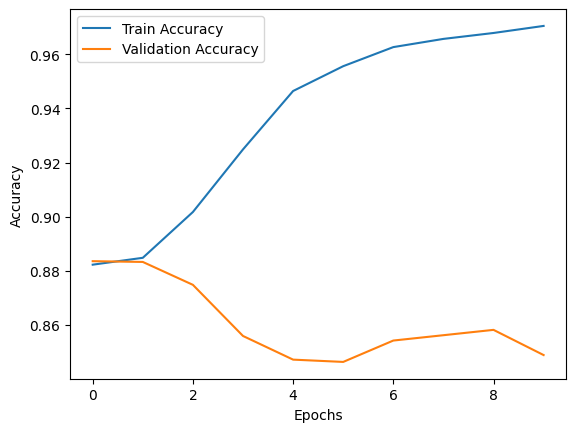

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#

# 7. Prediksi Sentimen

memprediksi sentimen dari data ulasan baru. Ulasan diubah menjadi urutan angka dan diproses ke dalam model untuk menghasilkan prediksi. Hasil prediksi dikonversi kembali ke label sentimen yang sesuai (positif, netral, negatif) dan dicetak bersama ulasan.

In [ ]:
# Predict sentiment on new data
new_reviews = ["Tempatnya sangat indah dan menyenangkan", "Kurang memuaskan, tidak sesuai ekspektasi"]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(new_sequences, maxlen=max_len, padding='post')
predictions = model.predict(new_padded)
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


In [ ]:
# Decode predicted classes
predicted_sentiments = label_encoder.inverse_transform(predicted_classes)
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review} -> Sentiment: {sentiment}")

Review: Tempatnya sangat indah dan menyenangkan -> Sentiment: positive
Review: Kurang memuaskan, tidak sesuai ekspektasi -> Sentiment: negative


In [ ]:
# Display the distribution of sentiment in a table format
sentiment_counts = pd.Series(predicted_sentiments).value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']
print(sentiment_counts)

  Sentiment  Count
0  positive      1
1  negative      1


RMSE & MAE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prediksi pada data testing
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Menghitung MAE dan RMSE
mae = mean_absolute_error(y_true_classes, y_pred_classes)
rmse = np.sqrt(mean_squared_error(y_true_classes, y_pred_classes))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE: 0.17
RMSE: 0.49


# Precision, Recall, dan MAP

In [ ]:
from sklearn.metrics import precision_score, recall_score, average_precision_score

# Precision dan Recall
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

# Mean Average Precision (MAP)
map_score = average_precision_score(y_test, y_pred_probs, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'MAP: {map_score:.2f}')

Precision: 0.83
Recall: 0.86
MAP: 0.84


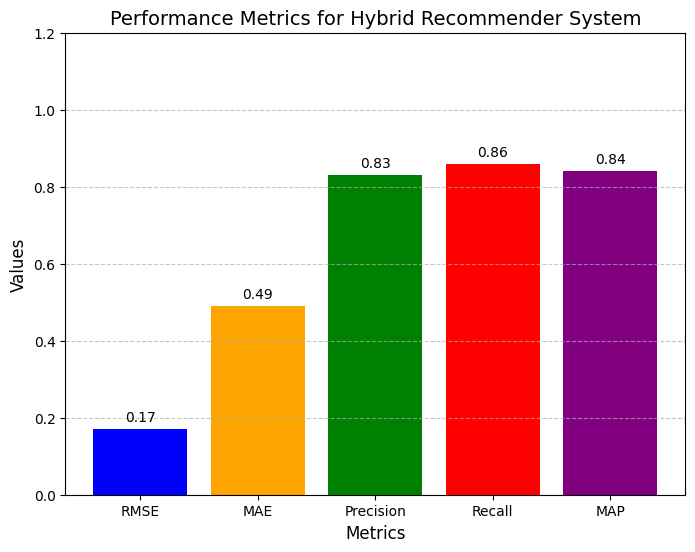

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data Hybrid Recommender System
metrics = ['RMSE', 'MAE', 'Precision', 'Recall', 'MAP']
values = [0.17, 0.49, 0.83, 0.86, 0.84]

# Membuat diagram batang
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red', 'purple'])

# Menambahkan nilai pada setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f'{yval:.2f}', ha='center', fontsize=10)

# Menambahkan label dan judul
plt.title('Performance Metrics for Hybrid Recommender System', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 1.2)  # Set batas sumbu Y agar precision (1.0) terlihat jelas

# Menampilkan diagram
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()